## Heatlthcare in Different States
In this project, I will use boxplots to investigate the way hospitals in different states across the United States charge their patients for medical procedures.

The data originally came from the <a href="https://data.cms.gov/Medicare-Inpatient/Inpatient-Prospective-Payment-System-IPPS-Provider/97k6-zzx3" target="_blank" rel="noopener" class="anchor__3DnlHDlaeJnh9whw0dBR8K">United States Health and Human Services Department</a>

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

healthcare = pd.read_csv(r'C:\Users\User\Desktop\language\DATA JOURNEY\python\Data visualization_&_stats\Datasets\Inpatient_Prospective_Payment_System__IPPS__Provider_Summary_for_the_Top_100_Diagnosis-Related_Groups__DRG__-_FY2011.csv')
display(healthcare.head())
# display(healthcare.value_counts())
# print(healthcare.dtypes, healthcare.describe(), healthcare.shape)
display(healthcare.columns)


,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44


Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       ' Total Discharges ', ' Average Covered Charges ',
       ' Average Total Payments ', 'Average Medicare Payments'],
      dtype='object')

In [3]:
#Checking the unique entries of medical procedures in DRG definition
print(healthcare['DRG Definition'].unique())
print(healthcare['DRG Definition'].nunique())

['039 - EXTRACRANIAL PROCEDURES W/O CC/MCC'
 '057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O MCC'
 '069 - TRANSIENT ISCHEMIA'
 '064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W MCC'
 '065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W CC'
 '066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC'
 '074 - CRANIAL & PERIPHERAL NERVE DISORDERS W/O MCC'
 '101 - SEIZURES W/O MCC' '149 - DYSEQUILIBRIUM'
 '176 - PULMONARY EMBOLISM W/O MCC'
 '177 - RESPIRATORY INFECTIONS & INFLAMMATIONS W MCC'
 '189 - PULMONARY EDEMA & RESPIRATORY FAILURE'
 '178 - RESPIRATORY INFECTIONS & INFLAMMATIONS W CC'
 '190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC'
 '191 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC'
 '193 - SIMPLE PNEUMONIA & PLEURISY W MCC'
 '194 - SIMPLE PNEUMONIA & PLEURISY W CC'
 '192 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W/O CC/MCC'
 '195 - SIMPLE PNEUMONIA & PLEURISY W/O CC/MCC'
 '202 - BRONCHITIS & ASTHMA W CC/MCC'
 '203 - BRONCHITIS & ASTHMA W/O CC/MCC'
 '207 - RESPIRAT

C:\Users\User\miniconda3\lib\site-packages\pandas\core\frame.py:4301: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


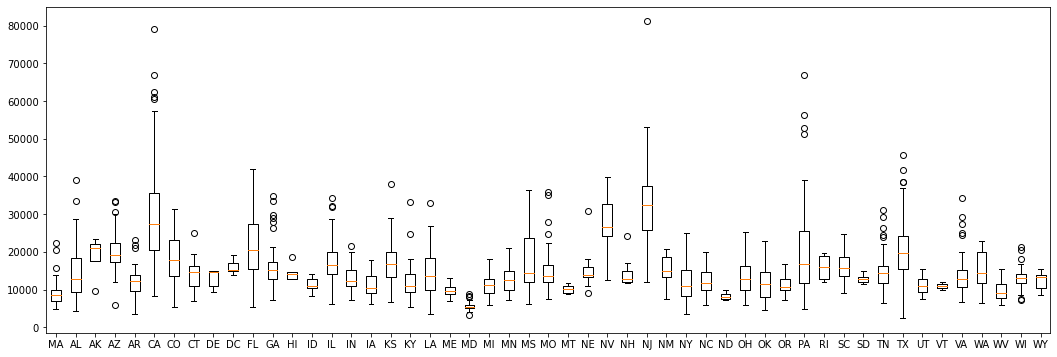

In [4]:

#Investigating the Average covered Charges for chest pain in all states
chest_pain = healthcare[healthcare['DRG Definition'] == '313 - CHEST PAIN']
# print(chest_pain)
alabama_chest_pain = chest_pain[chest_pain['Provider State'] == 'AL']
cost = alabama_chest_pain[' Average Covered Charges '].values
# print(cost)
# plt.boxplot(cost)
# plt.show()
chest_pain.rename(columns = {' Total Discharges ': 'Total Discharges'}, inplace=True)

states = chest_pain['Provider State'].unique()
# print(states.shape)

datasets = []

for state in states:
    datasets.append(chest_pain[chest_pain['Provider State'] == state][' Average Covered Charges '].values)

plt.figure(figsize=(18,6))
plt.boxplot(datasets, labels = states)
plt.show()


California, New Jersey, and Florida have the largest spreads. Vermont has almost no spread.

The state with the largest median cost for a chest pain diagnosis is New Jersey. The state with the smallest median cost is Maryland.

California, Georgia, and Tennessee all have a fair number of outliers.

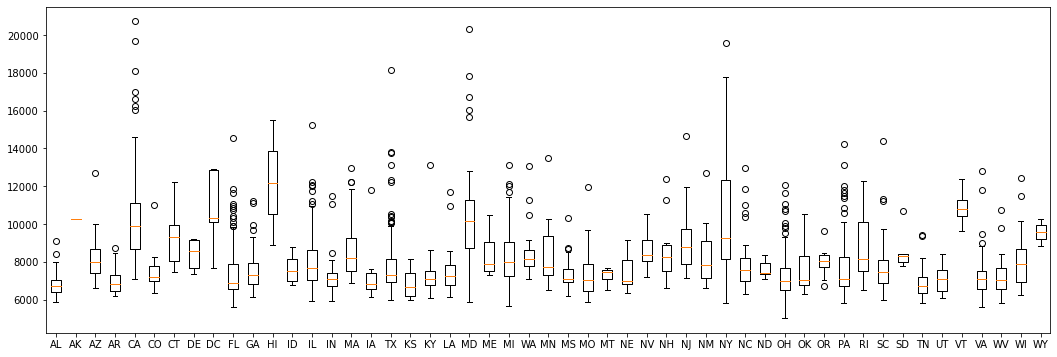

In [5]:
#Investigating Average Total Payments for kidney and urinary tract infections
kidney_inf = healthcare[healthcare['DRG Definition'] == '689 - KIDNEY & URINARY TRACT INFECTIONS W MCC']
# display(kidney_inf)
states = kidney_inf['Provider State'].unique()

dataset = []
for state in states:
    dataset.append(kidney_inf[kidney_inf['Provider State'] == state][' Average Total Payments '].values)

plt.figure(figsize=(18,6))
plt.boxplot(dataset, labels = states)
plt.show()

Arkansas has no spread, New york has the highest spread while Hawaii has the highest median. California, Maryland, Florida, Illinois, Ohio, Pennsylvania all have more than a few outliers